In [18]:
import copy
import os
import re
import shutil
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tifffile
import yaml
from einops import rearrange

In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2

In [21]:

import mushroom.registration.bigwarp as bigwarp
import mushroom.utils as utils

In [22]:
project_dir = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1'

In [23]:
default_scale = .2
dtype_to_scale = {}

## Define inputs

In [24]:
def ddfs_from_data_map(data_map):
    target_sid = data_map['target_sid']

    sid_to_ddf = {}

    for idx, item in enumerate(data_map['sections']):
        sid = item['sid']
        mapping = item['data'][0]
        dtype, filepath = mapping['dtype'], mapping['filepath']
        scale = dtype_to_scale.get(dtype, default_scale)

        if sid != target_sid: # initial registration target section will not have ddf
            ddf_fp = os.path.join(reg_dir, f's{idx}_{sid}_ddf.tif')

            assert os.path.exists(ddf_fp), f'Expected a warp field file at {ddf_fp}, but no file was found.'
            ddf = bigwarp.read_bigwarp_warp_field(ddf_fp, scale) # ddfs are (c h w)
            sid_to_ddf[sid] = ddf
    return sid_to_ddf

###### HT397B1

In [25]:
case = 'HT397B1'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [26]:
sid_to_multiplex = {
    'HT397B1-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U2_spatial_features.txt', 
    'HT397B1-U12': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U12_spatial_features.txt',
    'HT397B1-U22': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U22_spatial_features.txt',
    'HT397B1-U31': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U31_spatial_features.txt'
}

###### S18-9906

In [64]:
case = 'S18-9906'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [69]:
sid_to_multiplex = {
    'S18-9906-U3': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-9906/spatial_features/S18-9906-U10_spatial_features.txt', 
    'S18-9906-U10': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-9906/spatial_features/S18-9906-U10_spatial_features.txt', 
    'S18-9906-U18': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-9906/spatial_features/S18-9906-U18_spatial_features.txt',
    'S18-9906-U25': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-9906/spatial_features/S18-9906-U25_spatial_features.txt',
}

###### HT413C1-Th1k4A1

In [74]:
case = 'HT413C1-Th1k4A1'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [81]:
sid_to_multiplex = {
    'HT413C1-Th1k4A1-U3': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U3_spatial_features.txt', 
#     'HT413C1-Th1k4A1-U10': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U10_spatial_features.txt', 
    'HT413C1-Th1k4A1-U20': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U20_spatial_features.txt',
    'HT413C1-Th1k4A1-U26': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U26_spatial_features.txt',
    'HT413C1-Th1k4A1-U32': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U32_spatial_features.txt',
    'HT413C1-Th1k4A1-U37': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U37_spatial_features.txt',
    'HT413C1-Th1k4A1-U41': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U41_spatial_features.txt',
    'HT413C1-Th1k4A1-U42': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-Th1k4A1/spatial_features/HT413C1_Th1k4A1_U42_spatial_features.txt',
}

###### S18-25943-A7

In [86]:
case = 'S18-25943-A7'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [91]:
sid_to_multiplex = {
#     'S18-25943-A7-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-25943-A7/spatial_features/S18-25943-U2_spatial_features.txt', 
    'S18-25943-A7-U9': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-25943-A7/spatial_features/S18-25943-U9_spatial_features.txt', 
    'S18-25943-A7-U13': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-25943-A7/spatial_features/S18-25943-U13_spatial_features.txt',
#     'S18-25943-A7-U16': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-25943-A7/spatial_features/S18-25943-U16_spatial_features.txt',
}

###### HT206B1

In [97]:
case = 'HT206B1'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [100]:
sid_to_multiplex = {
    'HT206B1-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT206B1/spatial_features/HT206B1-H2L1-U2_spatial_features.txt', 
    'HT206B1-U5': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT206B1/spatial_features/HT206B1-H2L1-U5_spatial_features.txt', 
    'HT206B1-U10': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT206B1/spatial_features/HT206B1-H2L1-U10_spatial_features.txt',
    'HT206B1-U13': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT206B1/spatial_features/HT206B1-H2L1-U13_spatial_features.txt',
    'HT206B1-U18': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT206B1/spatial_features/HT206B1-H2L1-U18_spatial_features.txt',
    'HT206B1-U21': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT206B1/spatial_features/HT206B1-H2L1-U21_spatial_features.txt',
}

###### S18-5591-C8

In [117]:
case = 'S18-5591-C8'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [122]:
sid_to_multiplex = {
#     'S18-5591-C8-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U2_spatial_features.txt', 
#     'S18-5591-C8-U6': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U6_spatial_features.txt', 
    'S18-5591-C8-U8': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U8_spatial_features.txt',
    'S18-5591-C8-U14': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U14_spatial_features.txt',
    'S18-5591-C8-U19': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U19_spatial_features.txt', 
    'S18-5591-C8-U21': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U21_spatial_features.txt', 
    'S18-5591-C8-U23': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U23_spatial_features.txt',
    'S18-5591-C8-U24': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/S18-5591-C8/spatial_features/S18-5591-U24_spatial_features.txt',
}

###### C3L-00982

In [128]:
case = 'C3L-00982'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [133]:
sid_to_multiplex = {
    'C3L-00982-U1': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-00982/spatial_features/C3L-00982-11_U1_spatial_features.txt', 
    'C3L-00982-U4': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-00982/spatial_features/C3L-00982-11_U4_spatial_features.txt', 
    'C3L-00982-U7': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-00982/spatial_features/C3L-00982-11_U7_spatial_features.txt',
}

###### C3L-02551

In [142]:
case = 'C3L-02551'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [143]:
sid_to_multiplex = {
    'C3L-02551-U1': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-02551/spatial_features/C3L-02551-11_U1_spatial_features.txt', 
    'C3L-02551-U4': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-02551/spatial_features/C3L-02551-11_U4_spatial_features.txt', 
    'C3L-02551-U8': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-02551/spatial_features/C3L-02551-11_U8_spatial_features.txt',
}

###### C3L-00970

In [148]:
case = 'C3L-00970'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [151]:
sid_to_multiplex = {
    'C3L-00970-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-00970/spatial_features/C3L-00970-13u2_spatial_features.txt', 
}

###### C3L-01287

In [157]:
case = 'C3L-01287'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [160]:
sid_to_multiplex = {
    'C3L-01287-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/C3L-01287/spatial_features/C3L-01287-11Us1_spatial_features.txt', 
}

###### HT413C1-K2

In [165]:
case = 'HT413C1-K2'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [168]:
sid_to_multiplex = {
    'HT413C1-K2-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT413C1-K2/spatial_features/HT413C1-K2_spatial_features.txt', 
}

###### HT339B2-H1

In [173]:
case = 'HT339B2-H1'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [176]:
sid_to_multiplex = {
    'HT339B2-H1-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT339B2-H1/spatial_features/HT339B2-H1_spatial_features.txt', 
}

###### HT553P1-H2

In [181]:
case = 'HT553P1-H2'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [184]:
sid_to_multiplex = {
    'HT553P1-H2-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT553P1-H2/spatial_features/HT553P1-H2_spatial_features.txt', 
}

###### HT565B1-H2

In [192]:
case = 'HT565B1-H2'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [193]:
sid_to_multiplex = {
    'HT565B1-H2-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT565B1-H2/spatial_features/HT565B1-H2_spatial_features.txt', 
}

###### HT448C1-Th1K1Fp1

In [198]:
case = 'HT448C1-Th1K1Fp1'
output_dir = os.path.join(project_dir, case, 'auxiliary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [202]:
sid_to_multiplex = {
    'HT448C1-Th1K1Fp1-U2': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT448C1-Th1K1Fp1/spatial_features/HT488C1-Th1K1Fp1_spatial_features.txt', 
    'HT448C1-Th1K1Fp1-U14': '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT448C1-Th1K1Fp1/spatial_features/HT488C1-Th1K1Fp1-U14_spatial_features.txt', 
}

##### common

In [27]:
reg_dir = os.path.join(project_dir, case, 'registration')
data_map = yaml.safe_load(open(os.path.join(project_dir, case, 'registered', 'metadata.yaml')))

sid_to_ddf = ddfs_from_data_map(data_map)

sid_to_ddf.keys()

dict_keys(['HT397B1-U2', 'HT397B1-U4', 'HT397B1-U8', 'HT397B1-U11', 'HT397B1-U12', 'HT397B1-U16', 'HT397B1-U21', 'HT397B1-U22', 'HT397B1-U20', 'HT397B1-U28', 'HT397B1-U31'])

In [28]:
multiplex_fps = sorted(utils.listfiles(
    f'/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/{case}/spatial_features',
    regex=r'features.txt$'
))
multiplex_fps

['/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U12_spatial_features.txt',
 '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U22_spatial_features.txt',
 '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U2_spatial_features.txt',
 '/diskmnt/Projects/Users/estorrs/imaging-analysis/results/mushroom/HT397B1/spatial_features/HT397B1-S1H3A1-U31_spatial_features.txt']

In [29]:
set(sid_to_multiplex.keys()) - set(sid_to_ddf.keys())

set()

In [30]:
# sid_to_multiplex = {
#     '-U': '', 
#     '-U': '', 
#     '-U': '',
#     '-U': '',
# }

## common multiplex processing

In [31]:
sid_to_warped_df = {}
for sid, fp in sid_to_multiplex.items():
    print(sid)
    ddf = sid_to_ddf[sid]
    df = pd.read_csv(fp, sep='\t', index_col=0)
    pts = df[['row', 'col']].values.astype(int)
    warped, mask = bigwarp.warp_pts(pts, ddf)
    
    f = df[mask.numpy()]
    f['row'] = warped[:, 0]
    f['col'] = warped[:, 1]
    
#     print(sid, warped.max(0), ddf.shape)
    
    sid_to_warped_df[sid] = f

HT397B1-U2


/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['row'] = warped[:, 0]
/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['col'] = warped[:, 1]


HT397B1-U12


/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['row'] = warped[:, 0]
/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['col'] = warped[:, 1]


HT397B1-U22


/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['row'] = warped[:, 0]
/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['col'] = warped[:, 1]


HT397B1-U31


/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['row'] = warped[:, 0]
/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_17683/307250676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['col'] = warped[:, 1]


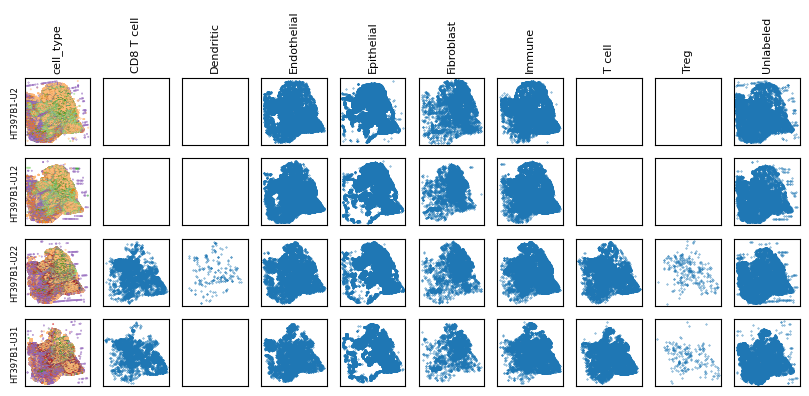

In [32]:
def format_axis(ax):
    ax.invert_yaxis()
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_fontsize(8)
    ax.yaxis.label.set_fontsize(6)
    
cell_types = sorted(set([x for df in sid_to_warped_df.values() for x in df['cell_type']]))
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c')
cell_type_to_color = {ct:c for ct, c in zip(cell_types, cmap)}

nrows, ncols = len(sid_to_warped_df), len(cell_types) + 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols, nrows))
if nrows == 1:
    axs = rearrange(axs, 'n -> 1 n')
max_x, max_y = 0, 0
for i, (sid, df) in enumerate(sid_to_warped_df.items()):
    ax = axs[i, 0]
    ax.scatter(df['col'], df['row'], c=[cell_type_to_color[x] for x in df['cell_type']], s=.1)
    ax.set_ylabel(sid, rotation=90)
    if i == 0:
        ax.set_title('cell_type', rotation=90)
    
    for j, ct in enumerate(cell_types):
        ax = axs[i, j + 1]
        f = df[df['cell_type']==ct]
        ax.scatter(f['col'], f['row'], s=.1)
        
        if i == 0:
            ax.set_title(ct, rotation=90)
    
    max_x = max(max_x, df['col'].max())
    max_y = max(max_y, df['row'].max())

for ax in axs.flatten():
    ax.set_xlim(0, max_x)
    ax.set_ylim(0, max_y)
    format_axis(ax)


In [33]:
save_dir = os.path.join(output_dir, 'multiplex')
Path(save_dir).mkdir(parents=True, exist_ok=True)
for sid, df in sid_to_warped_df.items():
    df.to_csv(os.path.join(save_dir, f'{sid}.txt'), sep='\t')

In [34]:
save_dir

'/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex'

In [35]:
# !ls /diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/**/auxiliary/multiplex/*.txt